In [1]:
# Imports and basic setup
### UNCOMMENT THE CORRECT ONE
# If you are using Jupyter Lab
# %matplotlib widget

# If you are using Jupyter Notebook
%matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 40})
import pandas as pd
import numpy as np

In [2]:
from scipy import signal

In [3]:
def pole_zero_plot(b=None, a=None, sos=None, ax=None, print_pz=True):
    from matplotlib import patches
    if sos is not None:
        zeros, poles, _ = signal.sos2zpk(sos)
    else:
        zeros, poles, _ = signal.tf2zpk(b, a)
    if print_pz is True:
        print("zeros:\n", zeros, "\npoles:\n'", poles)

    # To visualize pole-zero plane: plot unit circle and x,y axis
    if not ax:
        plt.figure()
        ax = plt.subplot(1, 1, 1)
    
    # Check for duplicates poles or zeros
    import collections
    multi_pole = ((k, v) for k, v in collections.Counter(poles).items() if v > 1)
    multi_zeros = ((k, v) for k, v in collections.Counter(zeros).items() if v > 1)

    # plot circle
    circ = patches.Circle((0, 0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)

    #plot axis
    ax.axhline(y=0, color='0.9')
    ax.axvline(x=0, color='0.9')

    # plot poles and zeros
    ax.plot(zeros.real, zeros.imag, 'o', markersize=9, alpha=0.5)
    ax.plot(poles.real, poles.imag, 'x', markersize=9, alpha=0.5)
    
    # Add label for duplicates
    import itertools
    for pos, c in itertools.chain(multi_pole, multi_zeros):
        ax.text(pos.real, pos.imag, c, fontsize=12)

    ax.axis('scaled')
    ax.axis([-1.5, 1.5, -1.5, 1.5])
    
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    
def plot_freq_response(b=None, a=None, sos=None, sampling_rate=None, log_y=True,create_new_fig=True, label=None, unwrap=True):
    """Plot the freq response of a window.
    
    Args:
        coef: The coefficients of the window
        sampling_rate: The sampling rate of a potential signal to be filtered with the window
        log_y: If True the y=axis will be in base 10 log.
        create_new_fig: If True a new figure is created for the plot
    """
    # Calculate the frequency response using scipy.signal.freqz 
    # Use the fs parameter to calculate the output relative to the sampling rate
    if not sampling_rate:
        sampling_rate = 2 * np.pi
    
    if sos is not None:
        w, h = signal.sosfreqz(sos, fs=sampling_rate)
    else:
        w, h = signal.freqz(b, a, fs=sampling_rate)

    if create_new_fig:
        plt.figure()
    ax1 = plt.gca()
   
    if log_y is True:
        h_plot = 20 * np.log10(abs(h))
        ax1.set_ylabel('Amplification [dB]', color='b')
    else:
        h_plot = abs(h)
        ax1.set_ylabel('Amplification [no unit]', color='b')
    
    ax1.plot(w, h_plot, 'b', label=label)
    ax1.set_xlabel('Frequency [Hz]')
    ax2 = ax1.twinx()
    angles = np.angle(h)
    angles = np.nan_to_num(angles)
    if unwrap:
        angles = np.unwrap(angles)
    ax2.plot(w, angles, 'g', label=label)
    ax2.set_ylabel('Angle (radians)', color='g')
    ax2.grid()
    ax2.axis('tight')

## Ex 9.1: SOS-Filtering

In last exercise we learned that filters of high order can get numerically unstable.
A solution is to split a high-order filer into multiple filters of a lower order.
With SOS (second-order-section) filtering, we describe a higher order filter by filters of first or second order.

a) Create a “medium-order” Butterworth filter once using the parameter `output=’ba’`. Plot the pole-zero plot and the magnitude response of the filter.

b) Create the same filter using the parameter `output=’sos’`. Inspect the output. In how many sections was the filter divided?

Based on the documentation:
*Array of second-order filter coefficients, must have a shape (n_sections, 6). Each row corresponds to a second-order section, with the first three columns providing the numerator coefficients and the last three providing the denominator coefficients.*

c) Plot the pole-zero-plots for each section and compare it to the original pole-zero-plot. Now, plot the magnitude response of each section and compare it.

d) Increase the filter order until the simple filter gets unstable. Create an SOS-filter with the same order and compare the outputs in the z-plane and regarding the magnitude response.

### Solution:
This exercise is partially based on the [DSP lecture material of the Uni Rostock](https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/recursive_filters/cascaded_structures.html).

b) SOS divides a filter of order $N$ into $N/2$ second order filter. Each second order filter is described by 6 parameters (3 `a`’s and 3 `b`’s)

c) Combining all individual pole-zero plots yields the original set of poles and zeros (remember, poles or zeros in the very center of the unit circle do not effect the output).
   Multiplying the magnitude responses of each section yields the magnitude response of the original filter.
   
d) At higher filter order, the sos-filter remains stable and the filter design produces correct zeros and poles inside the unit circle. Surprisingly, some of these poles and zeros are placed at completely different positions. As of now, I couldn’t find a good explanation for this.

zeros:
 [-1.01060349+0.j         -1.00659644+0.00829374j -1.00659644-0.00829374j
 -0.99762799+0.01031285j -0.99762799-0.01031285j -0.99047382+0.0045786j
 -0.99047382-0.0045786j ] 
poles:
' [0.88986683+0.28188603j 0.88986683-0.28188603j 0.7974187 +0.20257022j
 0.7974187 -0.20257022j 0.74393428+0.1048779j  0.74393428-0.1048779j
 0.72654253+0.j        ]


<IPython.core.display.Javascript object>


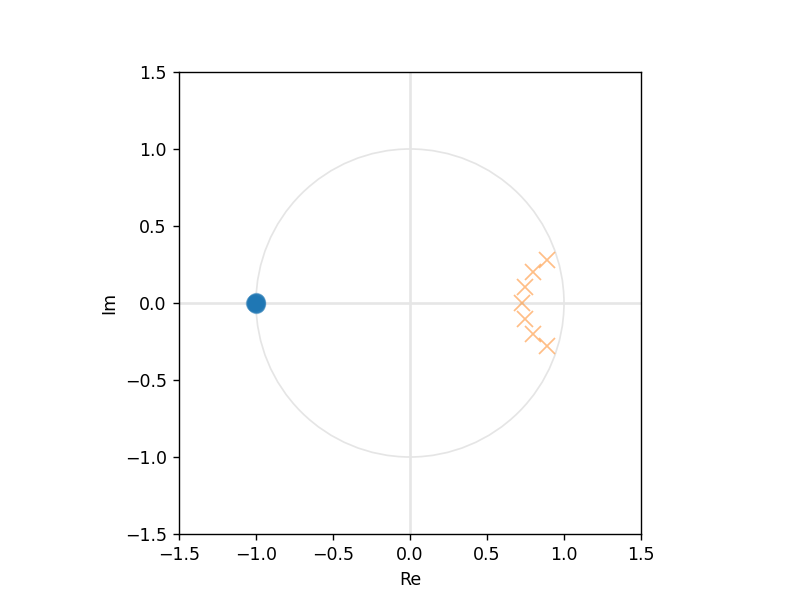

<IPython.core.display.Javascript object>


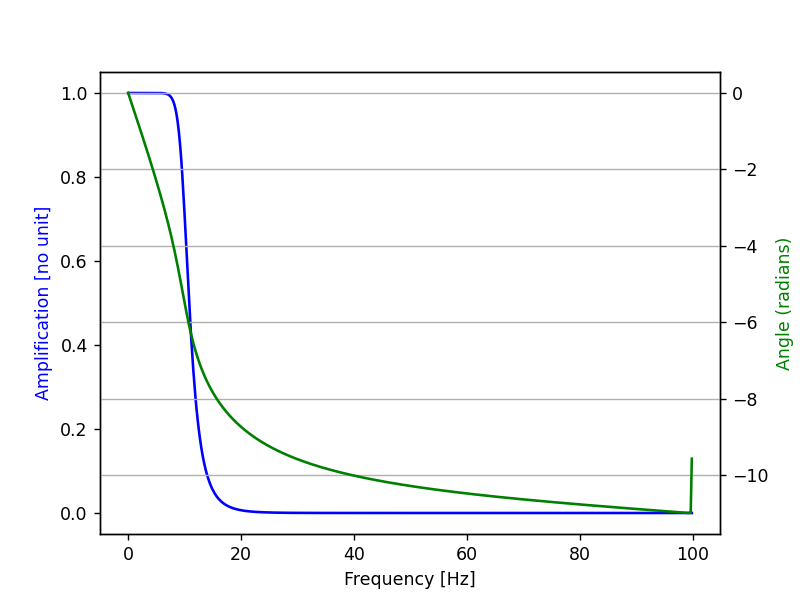

In [4]:
from scipy import signal

N = 7
Wn = 10  # Hz
sampling_rate = 200  # Hz

# Create a butterworth filter using the `ba` output.

### BEGIN SOLUTION
b, a = signal.butter(N, Wn, fs=sampling_rate, output='ba')
### END SOLUTION

# Plot the Pole-zero plot and the magnitude response
### BEGIN SOLUTION
pole_zero_plot(b, a)
plot_freq_response(b, a, sampling_rate=sampling_rate, log_y=False)
### END SOLUTION

In [5]:
# Create the same filter using `sos` output
### BEGIN SOLUTION
sos = signal.butter(N, Wn, fs=sampling_rate, output='sos')
### END SOLUTION
# Inspect the output
### BEGIN SOLUTION
n_sections = sos.shape[0]
print('The filter was divided into {} sections.'.format(n_sections))
### END SOLUTION

The filter was divided into 4 sections.


<IPython.core.display.Javascript object>


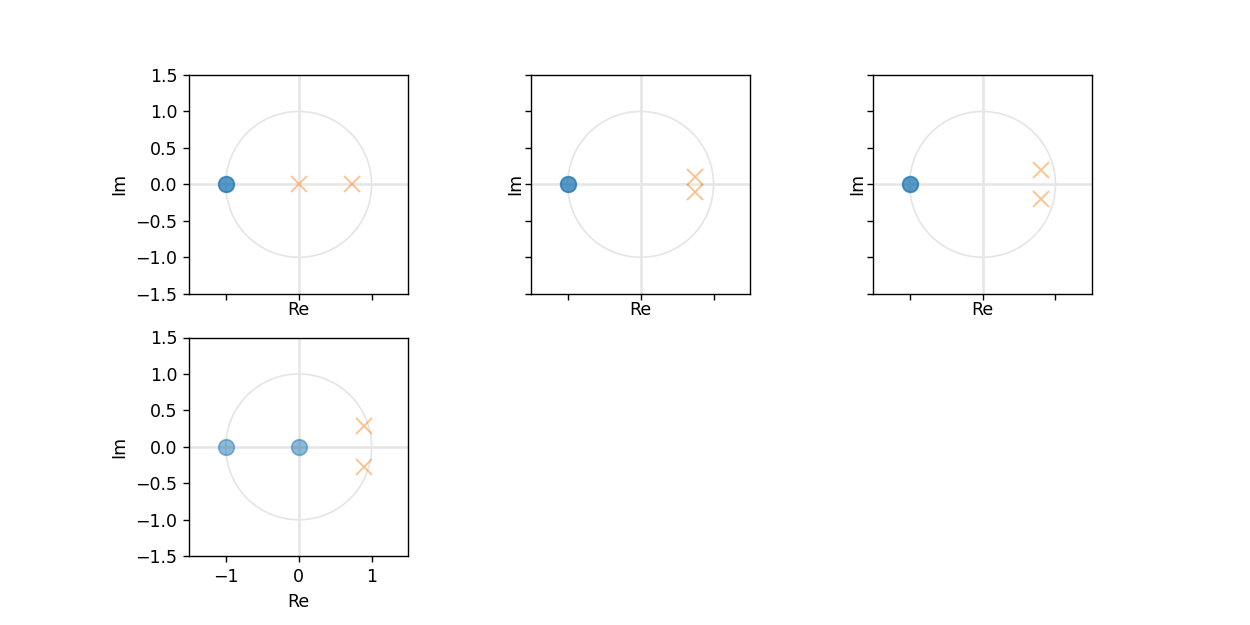

zeros:
 [-1.+6.68896751e-09j -1.-6.68896751e-09j] 
poles:
' [0.72654253 0.        ]
zeros:
 [-1.+6.68896751e-09j -1.-6.68896751e-09j] 
poles:
' [0.74393428+0.1048779j 0.74393428-0.1048779j]
zeros:
 [-1.+6.68896751e-09j -1.-6.68896751e-09j] 
poles:
' [0.7974187+0.20257022j 0.7974187-0.20257022j]
zeros:
 [-1.  0.] 
poles:
' [0.88986683+0.28188603j 0.88986683-0.28188603j]


<IPython.core.display.Javascript object>


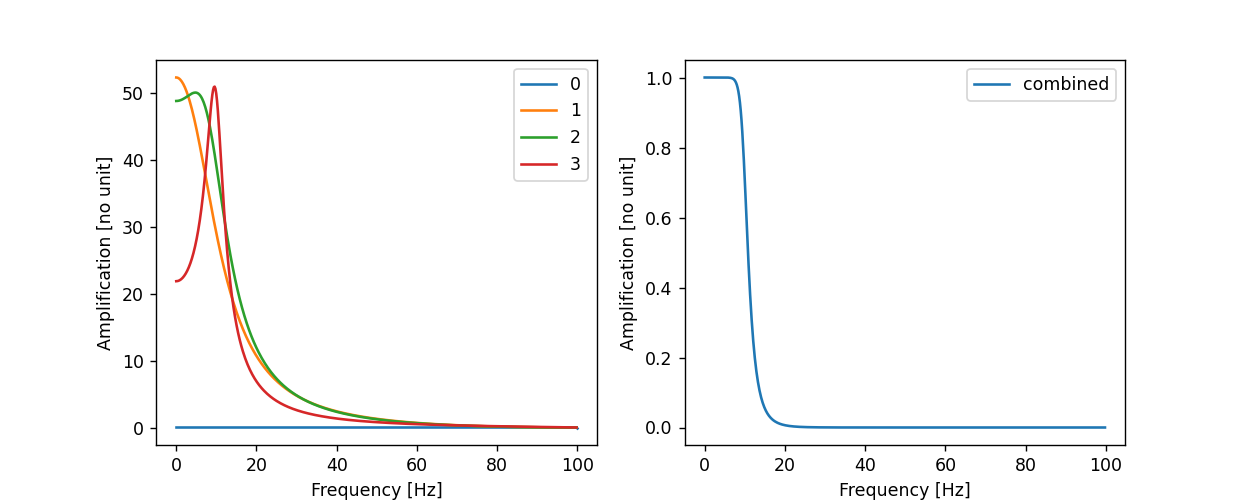

In [6]:
# Plot the pole zero plot for each section
### BEGIN SOLUTION
fig, axs = plt.subplots(int(np.ceil(n_sections / 3)), 3, figsize=(10, 5), sharey=True, sharex=True)
for coef, ax in zip(sos, axs.flatten()):
    pole_zero_plot(coef[:3], coef[3:], ax=ax)
for ax in axs.flatten()[sos.shape[0]:]:
    fig.delaxes(ax)
### END SOLUTION

# Plot the magnitude response of each sos section
### BEGIN SOLUTION
fig, axs = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))
combined = None
for n, coef in enumerate(sos):
    w, h = signal.freqz(coef[:3], coef[3:], fs=sampling_rate)
    axs[0].plot(w, np.abs(h), label=n)
    if combined is None:
        combined = h
    else:
        combined *= h

# Plot the combined response of all sections, calculated by multiplying all individual responses
axs[1].plot(w, np.abs(combined), label='combined')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplification [no unit]');
### END SOLUTION

C:\Users\HP\anaconda3\envs\new2\lib\site-packages\scipy\signal\filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<IPython.core.display.Javascript object>


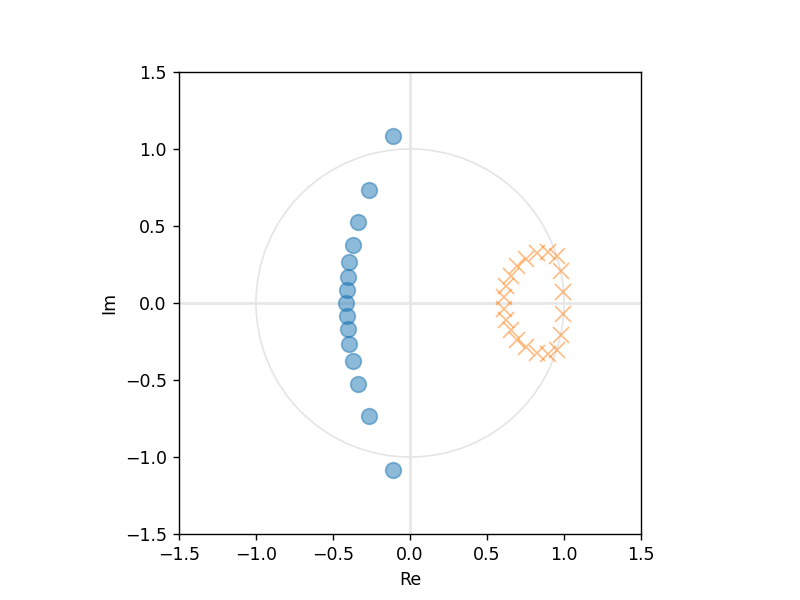

<IPython.core.display.Javascript object>


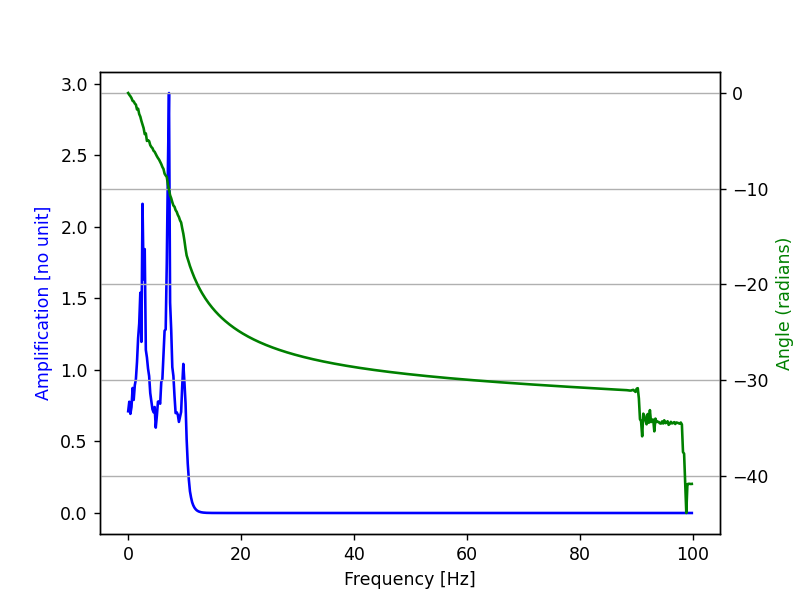

In [7]:
# Find a filter order N, where the traditional filter becomes unstable.
# Than repeat the analysis above using this N
### BEGIN SOLUTION
N = 20

# Create a butterworth filter using the `ba` output.
b, a = signal.butter(N, Wn, fs=sampling_rate, output='ba')
# Plot the Pole-zero plot and the magnitude response
pole_zero_plot(b, a, print_pz=False)
plot_freq_response(b, a, sampling_rate=sampling_rate, log_y=False)
### END SOLUTION

C:\Users\HP\anaconda3\envs\new2\lib\site-packages\scipy\signal\filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<IPython.core.display.Javascript object>


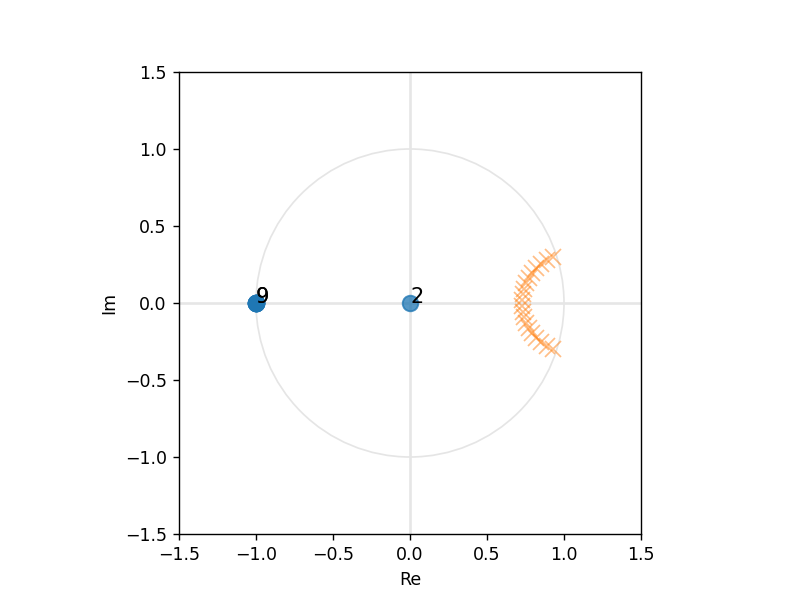

<IPython.core.display.Javascript object>


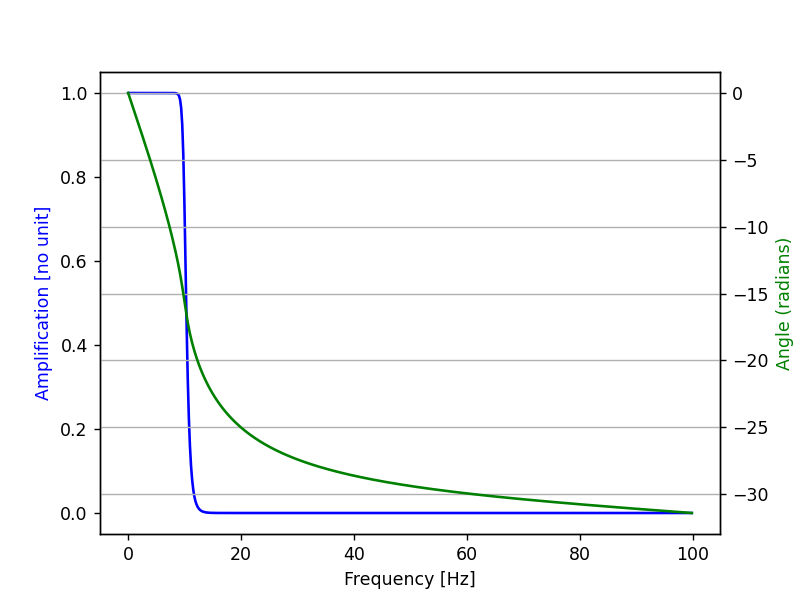

In [8]:
# Recreate the unstable filter as SOS
# Note that both, `pole_zero_plot` and the `plot_freq_response` have parameters to deal with sos intput.
### BEGIN SOLUTION
# Create a butterworth filter using the `sos` output.
sos = signal.butter(N, Wn, fs=sampling_rate, output='sos')
# Plot the Pole-zero plot and the magnitude response ()
pole_zero_plot(sos=sos, print_pz=False)
plot_freq_response(sos=sos, sampling_rate=sampling_rate, log_y=False)
### END SOLUTION

## Ex 9.2: Pan-Tompkins 1

The Pan-Tompkins algorithm is the most famous algorithm for detecting QRS complexes in ECG signals.
In the following we will implement the filter part of the Pan-Tompkins and apply it some ECG data that was recorded during the measurement exercise last year.

Use the lecture as reference for all parts of the filter cascade.

a) Implement the low-pass and high-pass component of the band-pass filter and apply it to the test data

b) Implement the differentiator and apply it to the test data

c) Square your test data

d) Implement the moving window integrator and apply it to the test signal


At every step you can use a pole-zero-plot to verify your implementation.

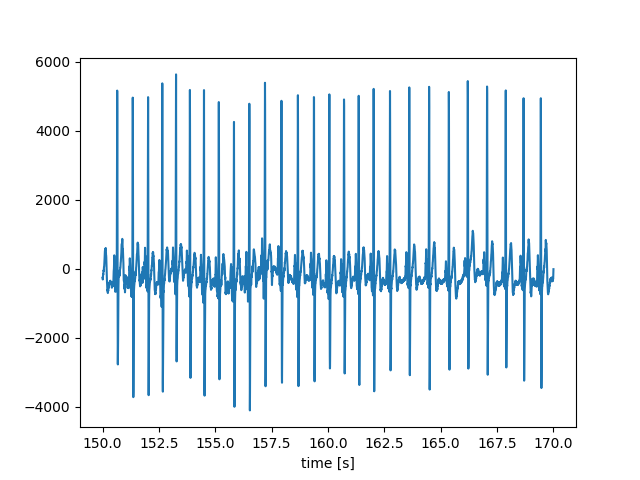

In [9]:
# Load one of the data files and extract the exg column
path = './data/example_ecg.csv'
orig_sampling_rate = 256.  # Hz
pan_sampling_rate = 200.  # Hz

ecg = pd.read_csv(path, header=1, skiprows=0, index_col='timestamp')['ecg']

# resample the data to 200 Hz for the algorithms
ecg = pd.Series(signal.resample(ecg, int(len(ecg) * pan_sampling_rate/orig_sampling_rate)))
ecg.index /= pan_sampling_rate

# For visualisation and testing select part of the signal
ecg_part = ecg.loc[150:170]

plt.figure()
ecg_part.plot()
plt.xlabel('time [s]');

### Bandpass Filter Part 1: Low-pass

### Solution:

From the lecture we know that the used low-pass filter has the following transfer function:

$y(n) = 2\cdot y(n-1) - y(n-2) + \frac{1}{32} \cdot (x(n) - 2\cdot x(n-6) + x(n-12))$

this leads to a transfer function of:

$H(z) = \frac{1}{32} \frac{z^{12} - 2z^6 + 1}{z^{12} - 2z^{11} + z^{10}}$

and finally to the following coefficients:

```
a_lowpass = [ 1 -2 1 0 0 0 0 0 0 0 0 0 0]
b_lowpass = [ 1/32 0 0 0 0 0 -2/32 0 0 0 0 0 1/32]
```

/Users/falk/Library/Caches/pypoetry/virtualenvs/biosig-exercise-rgLbKVqh-py3.8/lib/python3.8/site-packages/scipy/signal/filter_design.py:475: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


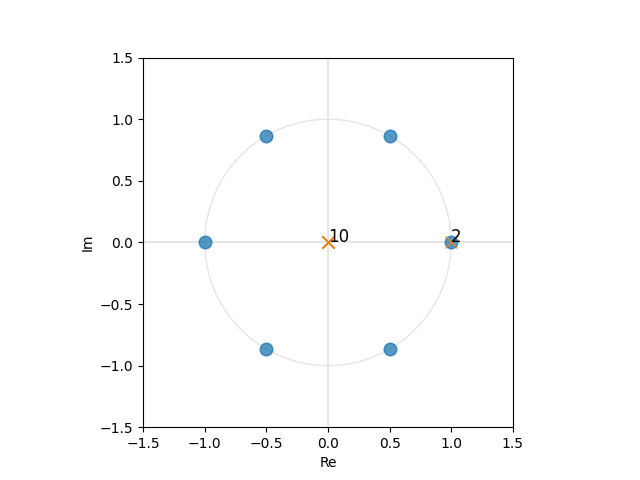

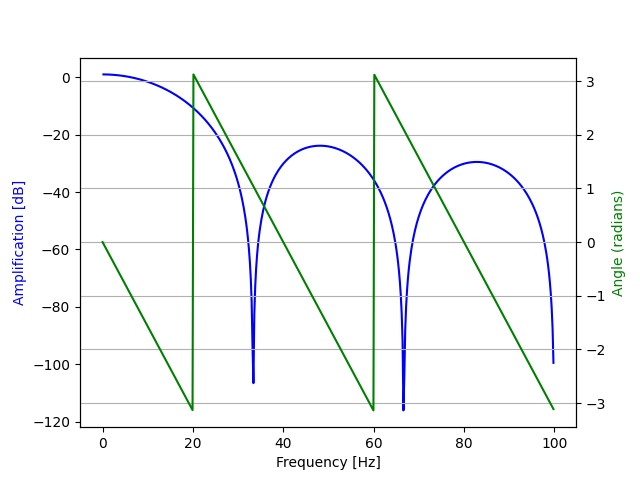

In [10]:
# Design the filter based on the transfer function given in the lecture 
# and produce a pole-zero and a magnitude response plot
### BEGIN SOLUTION
b_lowpass = np.zeros([13])
b_lowpass[0] = 1. / 32
b_lowpass[6] = -2. / 32
b_lowpass[12] = 1. / 32

a_lowpass = np.zeros([13])
a_lowpass[0] = 1.0
a_lowpass[1] = -2.0
a_lowpass[2] = 1.0

pole_zero_plot(b_lowpass, a_lowpass, print_pz=False)
plot_freq_response(b_lowpass, a_lowpass, sampling_rate=pan_sampling_rate, unwrap=False)
### END SOLUTION

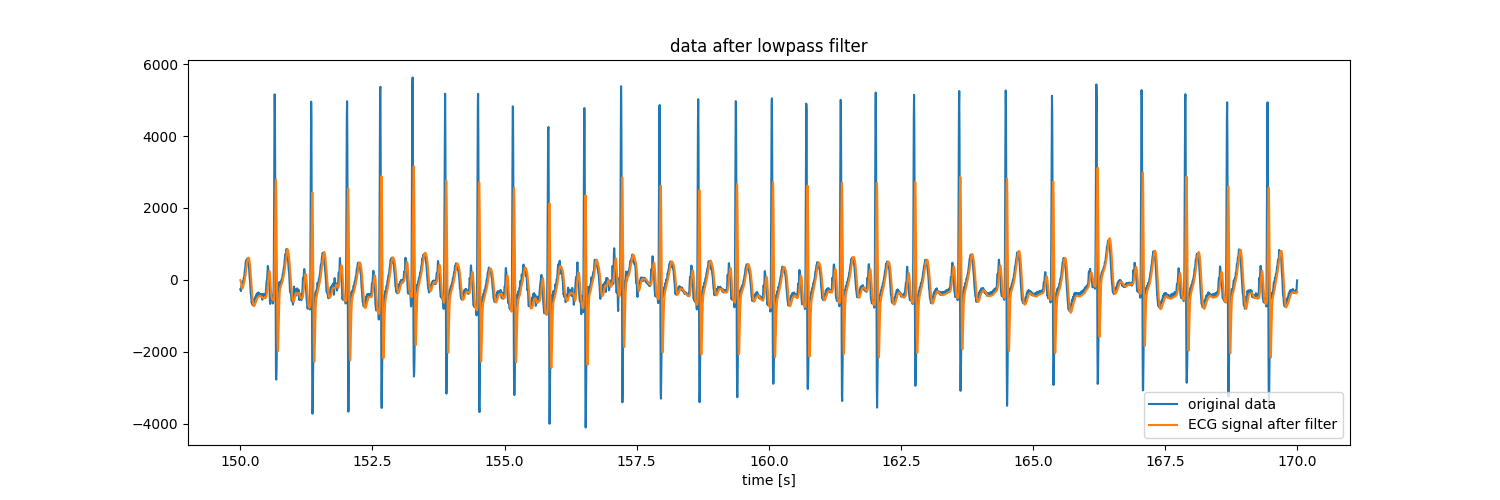

In [11]:
# Filter the ECG sample with the lowpass filter
### BEGIN SOLUTION
data_lp = signal.lfilter(b_lowpass, a_lowpass, ecg_part)

# plot result
plt.figure(figsize=(15, 5))
plt.plot(ecg_part.index, ecg_part, label='original data')
plt.plot(ecg_part.index, data_lp, label='ECG signal after filter')
plt.title('data after lowpass filter')
plt.xlabel('time [s]')
plt.legend();
### END SOLUTION

### Bandpass Filter Part 2: High-pass

### Solution:

From the lecture we know that the high-pass can be described by combining an all-pass with a low-pass filer.
The following function describes the low-pass component:

$y_{lp}(n) = y_{lp}(n-1) + x(n) - x(n-32)$

From this we can calculate the transfer function:

$H_{lp}(z) = \frac{z^{32} - 1}{z^{32} - z^{31}}$

When we substitute this into the overall transfer function, we got from the lecture, we get:

$H_{hp}(z) = z^{-16} - H_{lp}(z) = z^{-16} - \frac{1}{32} \frac{z^{32} - 1}{z^{32} - z^{31}} = \frac{z^{16} - z^{15} - \frac{1}{32}z^{32} + \frac{1}{32}}{z^{32} - z^{31}}$

And finally, the parameters:

```
a_highpass = [  1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
b_highpass = [ -1/32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1/32]
```

/Users/falk/Library/Caches/pypoetry/virtualenvs/biosig-exercise-rgLbKVqh-py3.8/lib/python3.8/site-packages/scipy/signal/filter_design.py:475: RuntimeWarning: invalid value encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


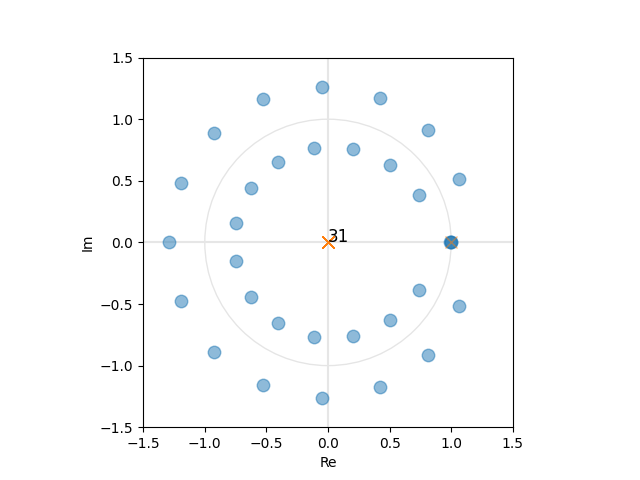

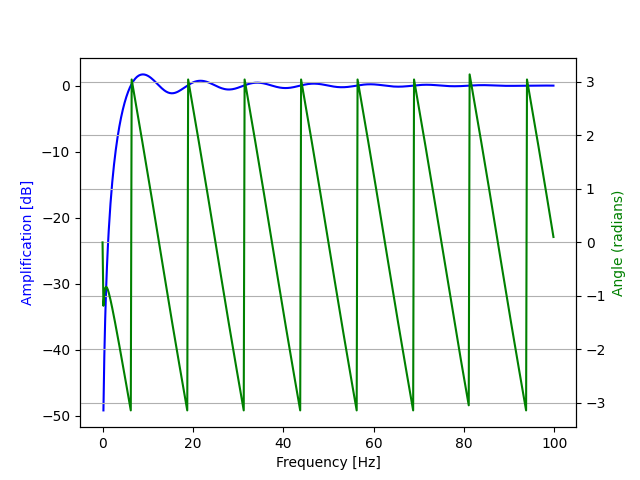

In [12]:
# Design the filter based on the transfer function given in the lecture 
# and produce a pole-zero and a magnitude response plot
### BEGIN SOLUTION
a_highpass = np.zeros([33])
a_highpass[0] = 1
a_highpass[1] = -1

b_highpass = np.zeros([33])
b_highpass[0] = -1 / 32
b_highpass[16] = 1
b_highpass[17] = -1
b_highpass[32] = 1 / 32

pole_zero_plot(b_highpass, a_highpass, print_pz=False)
plot_freq_response(b_highpass, a_highpass, sampling_rate=pan_sampling_rate, unwrap=False)
#### END SOLUTION

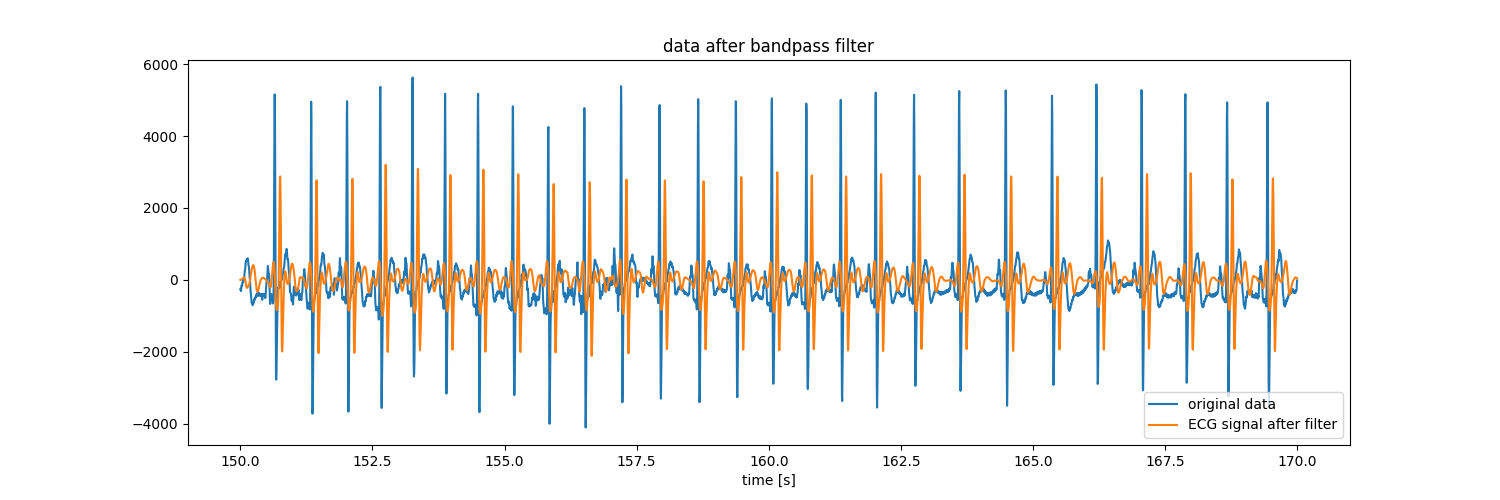

In [13]:
# Apply the filter to the already lowpassed filter data and plot the result
### BEGIN SOLUTION
data_hp = signal.lfilter(b_highpass, a_highpass, data_lp)
# plot result
plt.figure(figsize=(15, 5))
plt.plot(ecg_part.index, ecg_part, label='original data')
plt.plot(ecg_part.index, data_hp, label='ECG signal after filter')
plt.title('data after bandpass filter')
plt.xlabel('time [s]')
plt.legend();
### END SOLUTION

### Derivative Operator

### Solution:

From the lecture we know that the derivative operator can be described by the following equation:

$y(n) = \frac{1}{8}\left[2x(n)+x(n-1)-x(n-3)-2x(n-4)\right]$

From this we can calculate the transfer function:

$H(z) = \frac{1}{8}\frac{2z^{4}+z^{3}-z-2}{z^4}$

And finally, the parameters:

```
a_diff = [1 0 0 0 0]
b_diff = [1/4 1/8 0 -1/8 -1/4]
```

/var/folders/7k/kjbvq9gd7ql32q8997x6bksh0000gn/T/ipykernel_36002/4029736610.py:68: RuntimeWarning: divide by zero encountered in log10
  h_plot = 20 * np.log10(abs(h))


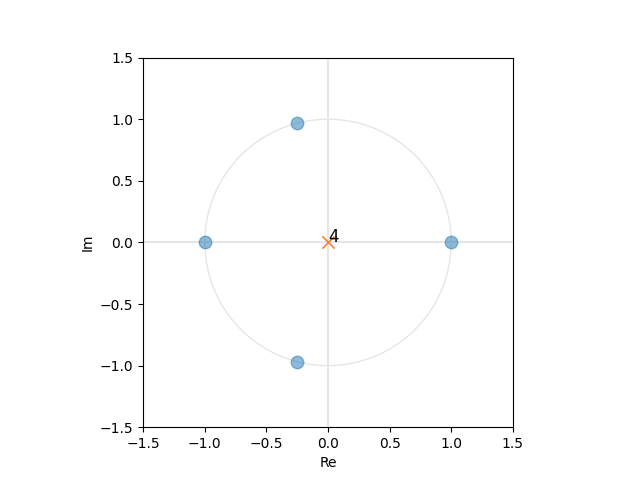

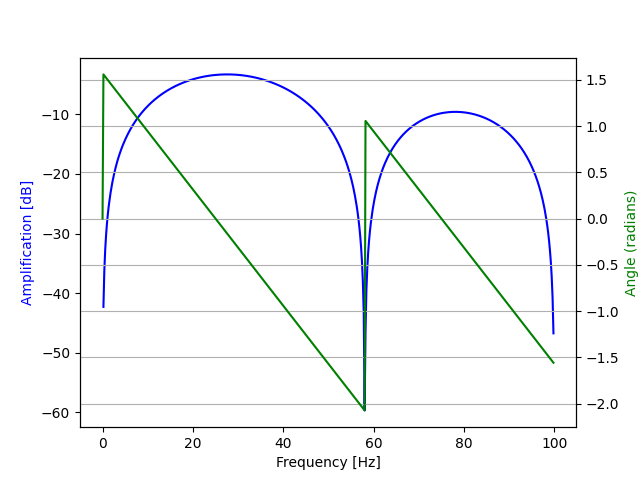

In [14]:
# Design the filter based on the transfer function given in the lecture 
# and produce a pole-zero and a magnitude response plot
### BEGIN SOLUTION
a_diff = np.array([1, 0, 0, 0, 0])
b_diff = np.array([1./4, 1./8, 0, -1./8, -1./4])

pole_zero_plot(b_diff, a_diff, print_pz=False)
plot_freq_response(b_diff, a_diff, sampling_rate=pan_sampling_rate, unwrap=False)
### END SOLUTION

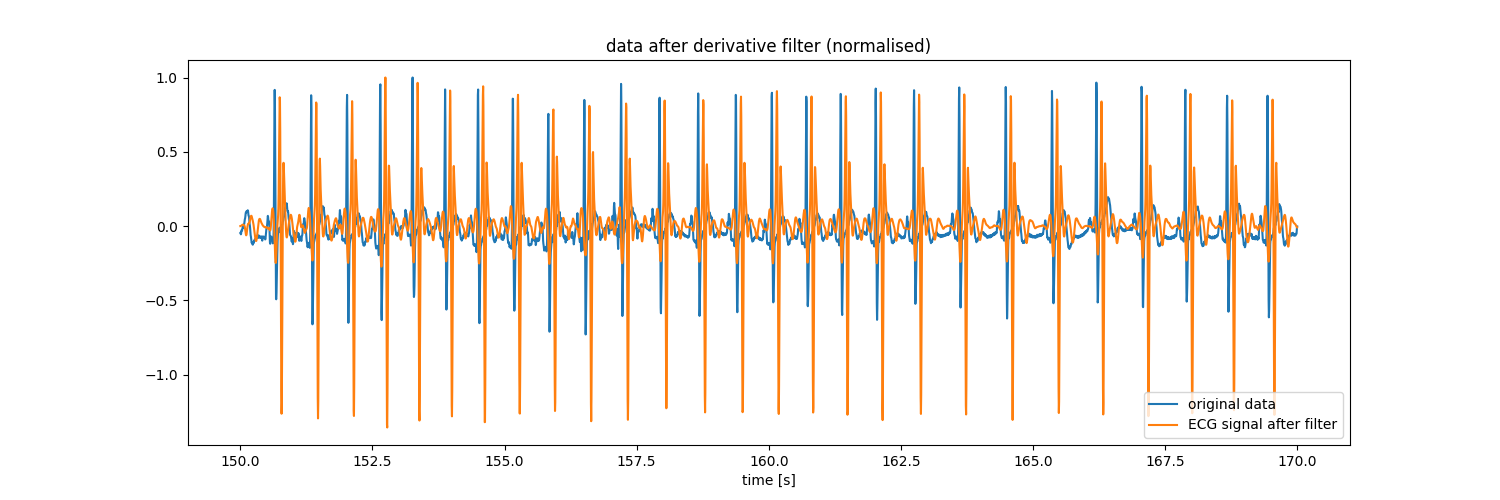

In [15]:
# Apply the filter to the already bandpassed filter data and plot the result
### BEGIN SOLUTION
data_diff = signal.lfilter(b_diff, a_diff, data_hp)
# plot result
plt.figure(figsize=(15, 5))
plt.plot(ecg_part.index, ecg_part / ecg_part.max(), label='original data')
plt.plot(ecg_part.index, data_diff / data_diff.max(), label='ECG signal after filter')
plt.title('data after derivative filter (normalised)')
plt.xlabel('time [s]')
plt.legend();
### END SOLUTION

### Squaring

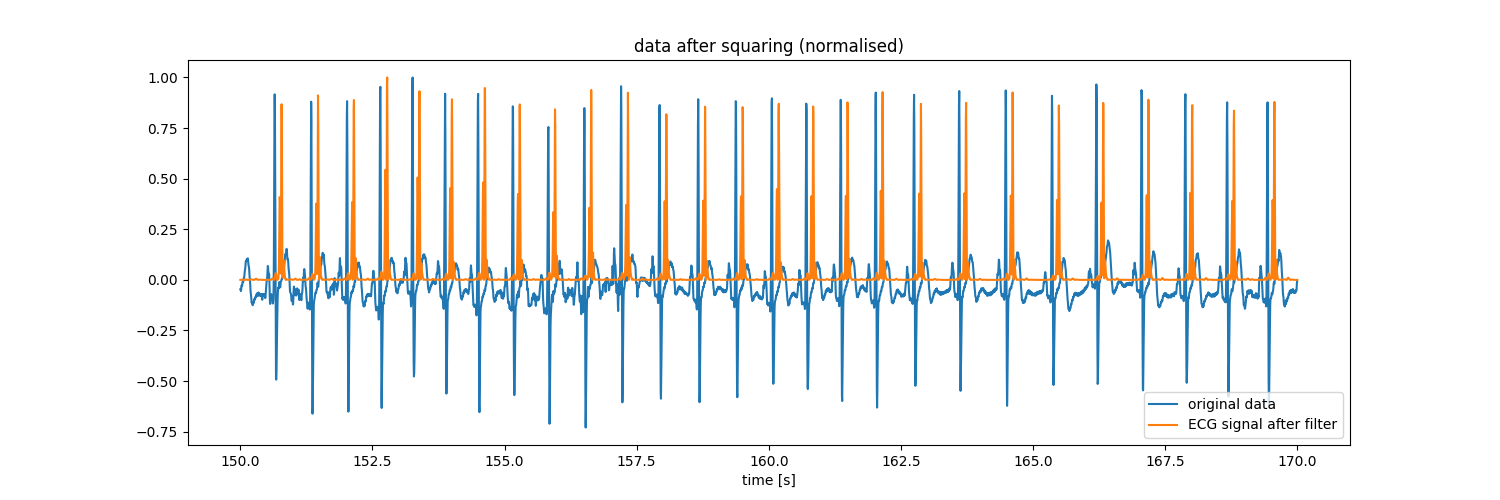

In [16]:
# Square the signal and plot the result
### BEGIN SOLUTION
data_sq = data_diff ** 2

# plot result
plt.figure(figsize=(15, 5))
plt.plot(ecg_part.index, ecg_part / ecg_part.max(), label='original data')
plt.plot(ecg_part.index, data_sq / data_sq.max(), label='ECG signal after filter')
plt.title('data after squaring (normalised)')
plt.xlabel('time [s]')
plt.legend();
### END SOLUTION

### Moving Window Integrator

### Solution:

From the lecture we know the transfer function:

$y(n) = \frac{1}{30}\left[x(n-29) + x(n-28) + ... +x(n)\right]$

From this we can calculate the transfer function:

$H(z) = \frac{1}{30}\frac{z^{29} + z^{28} + ... + 1}{z^{29}}$

And finally, we can read of the parameters:

```
a = [1 0 0 ... 0 0 0]  # 29 zeros
b = [1/30 1/30 1/30 .... 1/30]  # 30x 1/30
```

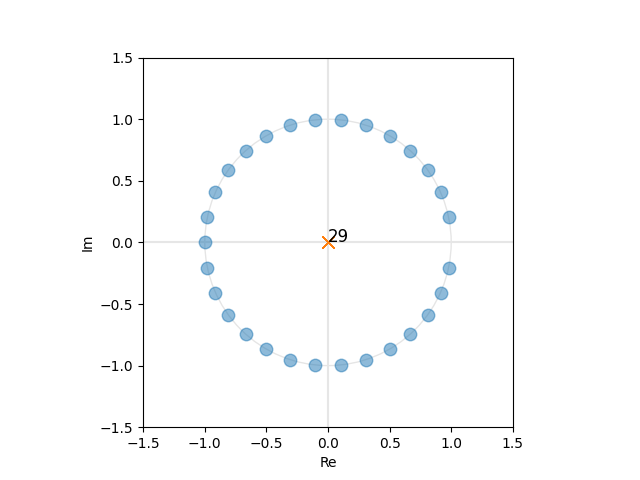

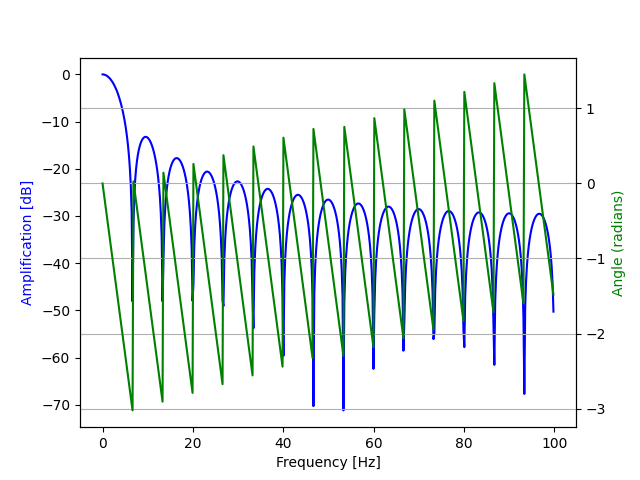

In [17]:
# Design the filter based on the transfer function given in the lecture 
# and produce a pole-zero and a magnitude response plot
### BEGIN SOLUTION
a_int = np.zeros(30)
a_int[0] = 1
b_int = np.ones(30) * 1/30

pole_zero_plot(b_int, a_int, print_pz=False)
plot_freq_response(b_int, a_int, sampling_rate=pan_sampling_rate, unwrap=False)
### END SOLUTION

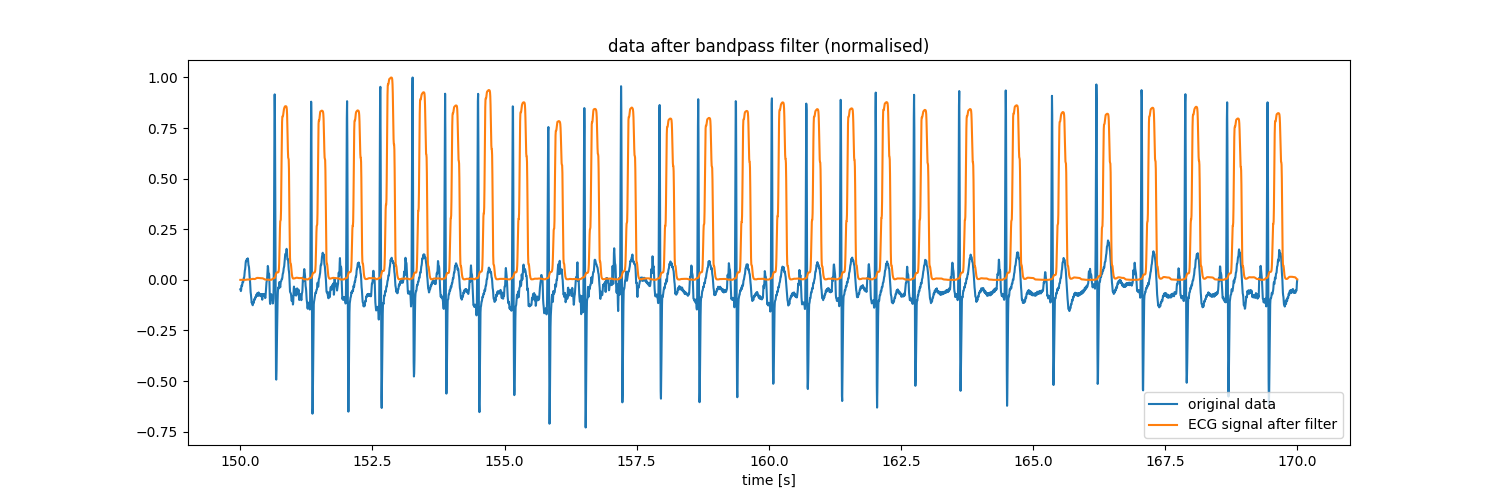

In [18]:
# Apply the filter to the sqaured data and plot the result
### BEGIN SOLUTION
data_final = signal.lfilter(b_int, a_int, data_sq)
# plot result
plt.figure(figsize=(15, 5))
plt.plot(ecg_part.index, ecg_part / ecg_part.max(), label='original data')
plt.plot(ecg_part.index, data_final / data_final.max(), label='ECG signal after filter')
plt.title('data after bandpass filter (normalised)')
plt.xlabel('time [s]')
plt.legend();
### END SOLUTION